# Q 1

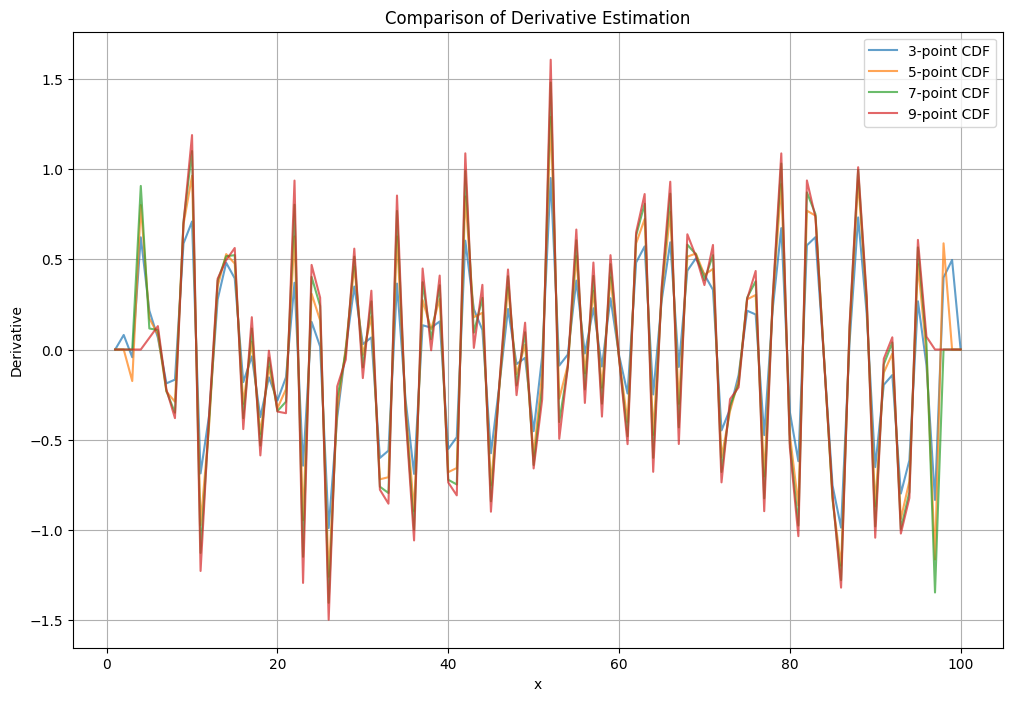

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
data = np.loadtxt('dataprofile.txt')
x = data[:, 0]  # Assuming first column is x
y = data[:, 1]  # Assuming second column is y

# Define central difference formulas for derivatives
def central_difference(y, h, order):
    n = len(y)
    dydx = np.zeros(n)
    if order == 3:
        for i in range(1, n - 1):
            dydx[i] = (y[i + 1] - y[i - 1]) / (2 * h)
    elif order == 5:
        for i in range(2, n - 2):
            dydx[i] = (y[i - 2] - 8 * y[i - 1] + 8 * y[i + 1] - y[i + 2]) / (12 * h)
    elif order == 7:
        for i in range(3, n - 3):
            dydx[i] = (-y[i - 3] + 9 * y[i - 2] - 45 * y[i - 1] +
                       45 * y[i + 1] - 9 * y[i + 2] + y[i + 3]) / (60 * h)
    elif order == 9:
        for i in range(4, n - 4):
            dydx[i] = (3 * y[i - 4] - 32 * y[i - 3] + 168 * y[i - 2] - 672 * y[i - 1] +
                       672 * y[i + 1] - 168 * y[i + 2] + 32 * y[i + 3] - 3 * y[i + 4]) / (840 * h)
    return dydx

# Compute step size
h = x[1] - x[0]

# Compute derivatives using different orders of central difference
dydx_3 = central_difference(y, h, 3)
dydx_5 = central_difference(y, h, 5)
dydx_7 = central_difference(y, h, 7)
dydx_9 = central_difference(y, h, 9)

# Plotting the results for comparison
plt.figure(figsize=(12, 8))
plt.plot(x, dydx_3, label='3-point CDF', alpha=0.7)
plt.plot(x, dydx_5, label='5-point CDF', alpha=0.7)
plt.plot(x, dydx_7, label='7-point CDF', alpha=0.7)
plt.plot(x, dydx_9, label='9-point CDF', alpha=0.7)
plt.legend()
plt.title("Comparison of Derivative Estimation")
plt.xlabel("x")
plt.ylabel("Derivative")
plt.grid()
plt.show()


# Q 2

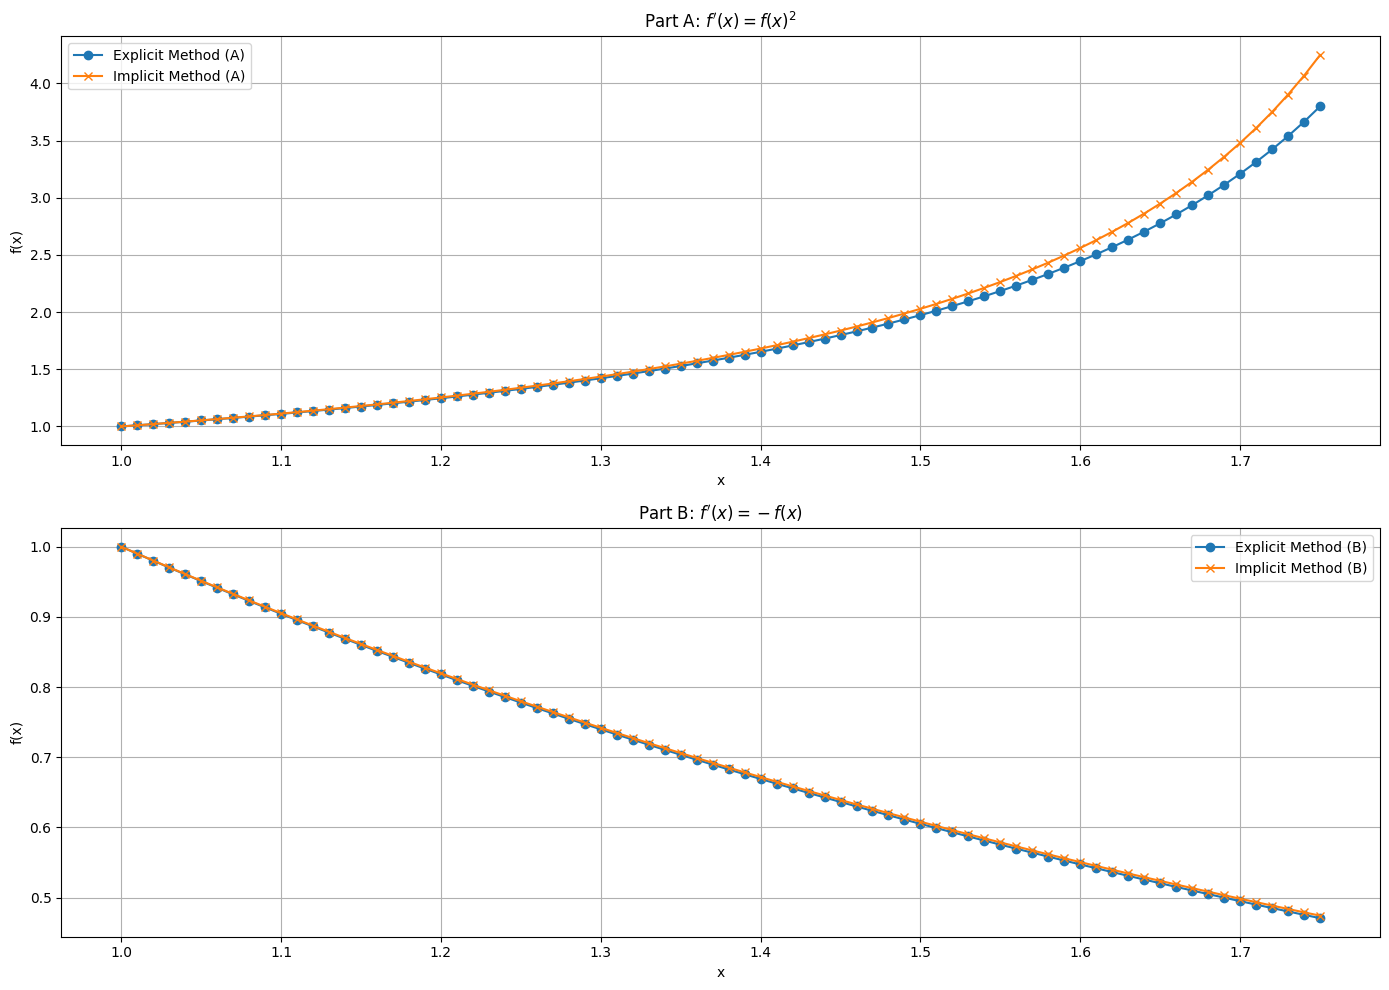

In [4]:

from scipy.optimize import fsolve

# Part A: f'(x) = f(x)^2
def explicit_a(f, dx):
    return f + dx * f**2

# Direct solution for Part A (quadratic equation for implicit method)
def implicit_a(f, dx):
    # Coefficients of the quadratic equation: ax^2 + bx + c = 0
    a = dx
    b = -1
    c = f
    # Solve quadratic equation
    discriminant = b**2 - 4 * a * c # if we put f(x = 1) = 1 here as c and dx = 0.5 then the discrimnant becomes negative!
    if discriminant < 0:
        print(f)
        raise ValueError("Negative discriminant encountered")
    f_next = (-b - np.sqrt(discriminant)) / (2 * a)  # Only positive root is valid
    return f_next

# Part B: f'(x) = -f(x)
def explicit_b(f, dx):
    return f - dx * f

def implicit_b(f, dx):
    return f / (1 + dx)

# Parameters
dx = 0.01
steps = 75  # Number of steps to compute
x_values = [1 + i * dx for i in range(steps + 1)]

# Initial condition
f_explicit_a, f_implicit_a = [1], [1]  # For Part A
f_explicit_b, f_implicit_b = [1], [1]  # For Part B


for _ in range(steps):
# Compute solutions for Part A (explicit and direct implicit)   
    f_explicit_a.append(explicit_a(f_explicit_a[-1], dx))
    f_implicit_a.append(implicit_a(f_implicit_a[-1], dx))

# Compute solutions for Part B (explicit and direct implicit)
    f_explicit_b.append(explicit_b(f_explicit_b[-1], dx))
    f_implicit_b.append(implicit_b(f_implicit_b[-1], dx))

# Plotting results
plt.figure(figsize=(14, 10))

# Part A Plot
plt.subplot(2, 1, 1)
plt.plot(x_values, f_explicit_a, label='Explicit Method (A)', marker='o')
plt.plot(x_values, f_implicit_a, label='Implicit Method (A)', marker='x')
plt.title("Part A: $f'(x) = f(x)^2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

# Part B Plot
plt.subplot(2, 1, 2)
plt.plot(x_values, f_explicit_b, label='Explicit Method (B)', marker='o')
plt.plot(x_values, f_implicit_b, label='Implicit Method (B)', marker='x')
plt.title("Part B: $f'(x) = -f(x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# Q 3

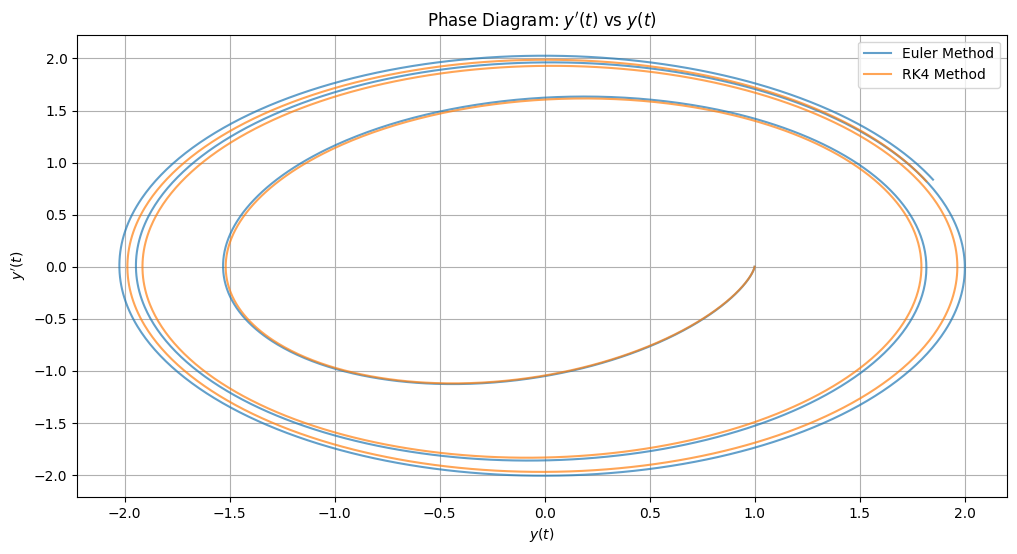

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.5
omega = 1.0
omega_1 = omega
A = 1.0  # Initial condition y(0)
h = 0.01  # Step size
T = 20.0  # Total simulation time

# Time steps
t_values = np.arange(0, T, h)
n_steps = len(t_values)

# Initialize arrays for Euler method
y_euler = np.zeros(n_steps)  # y(t)
y_prime_euler = np.zeros(n_steps)  # y'(t)

# Initial conditions
y_euler[0] = A
y_prime_euler[0] = 0

# Euler Method
for i in range(n_steps - 1):
    y_euler[i + 1] = y_euler[i] + h * y_prime_euler[i]
    y_prime_euler[i + 1] = y_prime_euler[i] + h * (np.cos(omega_1 * t_values[i]) - a * y_prime_euler[i] - omega**2 * y_euler[i])

# Initialize arrays for RK4 method
y_rk4 = np.zeros(n_steps)
y_prime_rk4 = np.zeros(n_steps)

# Initial conditions
y_rk4[0] = A
y_prime_rk4[0] = 0

# RK4 Method
for i in range(n_steps - 1):
    t = t_values[i]
    y1, yp1 = y_rk4[i], y_prime_rk4[i]

    # k1 values
    k1_y = yp1
    k1_yp = np.cos(omega_1 * t) - a * yp1 - omega**2 * y1

    # k2 values
    k2_y = yp1 + 0.5 * h * k1_yp
    k2_yp = np.cos(omega_1 * (t + 0.5 * h)) - a * (yp1 + 0.5 * h * k1_yp) - omega**2 * (y1 + 0.5 * h * k1_y)

    # k3 values
    k3_y = yp1 + 0.5 * h * k2_yp
    k3_yp = np.cos(omega_1 * (t + 0.5 * h)) - a * (yp1 + 0.5 * h * k2_yp) - omega**2 * (y1 + 0.5 * h * k2_y)

    # k4 values
    k4_y = yp1 + h * k3_yp
    k4_yp = np.cos(omega_1 * (t + h)) - a * (yp1 + h * k3_yp) - omega**2 * (y1 + h * k3_y)

    # Update y and y_prime
    y_rk4[i + 1] = y1 + (h / 6) * (k1_y + 2 * k2_y + 2 * k3_y + k4_y)
    y_prime_rk4[i + 1] = yp1 + (h / 6) * (k1_yp + 2 * k2_yp + 2 * k3_yp + k4_yp)

# Plotting the phase diagrams
plt.figure(figsize=(12, 6))
plt.plot(y_euler, y_prime_euler, label="Euler Method", alpha=0.7)
plt.plot(y_rk4, y_prime_rk4, label="RK4 Method", alpha=0.7)
plt.title("Phase Diagram: $y'(t)$ vs $y(t)$")
plt.xlabel("$y(t)$")
plt.ylabel("$y'(t)$")
plt.legend()
plt.grid()
plt.show()
